In [16]:
import gymnasium as gym
print([env_spec.id for env_spec in gym.envs.registry.values()])


['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'phys2d/CartPole-v0', 'phys2d/CartPole-v1', 'phys2d/Pendulum-v0', 'LunarLander-v3', 'LunarLanderContinuous-v3', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v3', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'tabular/Blackjack-v0', 'tabular/CliffWalking-v0', 'Reacher-v2', 'Reacher-v4', 'Reacher-v5', 'Pusher-v2', 'Pusher-v4', 'Pusher-v5', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedPendulum-v5', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'InvertedDoublePendulum-v5', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'HalfCheetah-v5', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Hopper-v5', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Swimmer-v5', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Walker2d-v5', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Ant-v5', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'Humanoid-v5', 'Humano

In [19]:
pip show mujoco

Name: mujoco
Version: 3.2.6
Summary: MuJoCo Physics Simulator
Home-page: 
Author: 
Author-email: Google DeepMind <mujoco@deepmind.com>
License: Apache License 2.0
Location: c:\Users\amanp\anaconda3\Lib\site-packages
Requires: absl-py, etils, glfw, numpy, pyopengl
Required-by: 
Note: you may need to restart the kernel to use updated packages.


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\amanp\anaconda3\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
c:\Users\amanp\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -431     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 176      |
|    time_elapsed    | 22       |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | 2.15     |
|    critic_loss     | 0.18     |
|    learning_rate   | 0.001    |
|    n_updates       | 3899     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -316     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 184      |
|    time_elapsed    | 43       |
|    total_timesteps | 8000     |
| train/             |          |
|    actor_loss      | 2.77     |
|    critic_loss     | 0.622    |
|    learning_rate   | 0.001    |
|    n_updates       | 7899     |
--------------

c:\Users\amanp\anaconda3\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | 1.07e+03 |
| time/              |          |
|    episodes        | 104      |
|    fps             | 160      |
|    time_elapsed    | 24       |
|    total_timesteps | 104000   |
| train/             |          |
|    actor_loss      | -79.8    |
|    critic_loss     | 2.73     |
|    learning_rate   | 0.001    |
|    n_updates       | 103899   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | 1.14e+03 |
| time/              |          |
|    episodes        | 108      |
|    fps             | 155      |
|    time_elapsed    | 51       |
|    total_timesteps | 108000   |
| train/             |          |
|    actor_loss      | -79.7    |
|    critic_loss     | 4.22     |
|    learning_rate   | 0.001    |
|    n_updates       | 107899   |
--------------

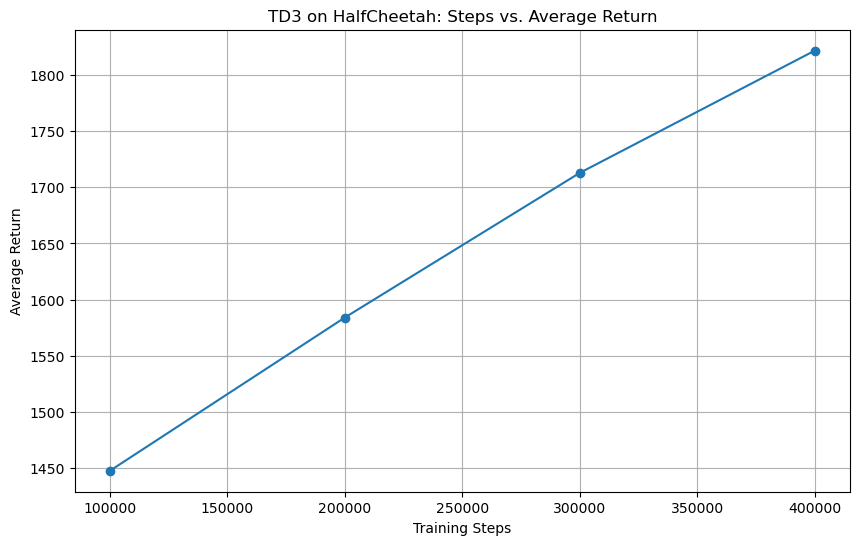

In [20]:
import gym
from stable_baselines3 import TD3
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.noise import NormalActionNoise
import numpy as np
import matplotlib.pyplot as plt

# Create the Gym environment
env = gym.make('HalfCheetah-v4')

# Define action noise for TD3
n_actions = env.action_space.shape[0]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

# Specify the device (GPU or CPU)
device = "cuda"  # Change to "cpu" if you don't have a GPU

# Initialize the TD3 model with GPU
model = TD3('MlpPolicy', env, action_noise=action_noise, verbose=1, device=device)

# Define evaluation and training parameters
eval_interval = 100_000
total_timesteps = 400_000
eval_episodes = 10

# Initialize lists to store evaluation results
steps_list = []
mean_rewards = []

steps_so_far = 0
while steps_so_far < total_timesteps:
    # Train for eval_interval steps
    model.learn(total_timesteps=eval_interval, reset_num_timesteps=False)
    steps_so_far += eval_interval
    
    # Evaluate the model
    mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=eval_episodes)
    steps_list.append(steps_so_far)
    mean_rewards.append(mean_reward)

# Plot steps vs. average return
plt.figure(figsize=(10, 6))
plt.plot(steps_list, mean_rewards, marker='o')
plt.title('TD3 on HalfCheetah: Steps vs. Average Return')
plt.xlabel('Training Steps')
plt.ylabel('Average Return')
plt.grid(True)
plt.show()


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\amanp\anaconda3\Lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -314     |
| time/              |          |
|    fps             | 543      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1e+03        |
|    ep_rew_mean          | -333         |
| time/                   |              |
|    fps                  | 476          |
|    iterations           | 2            |
|    time_elapsed         | 8            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0128409695 |
|    clip_fraction        | 0.137        |
|    clip_range           | 0.2          |
|    entropy_loss         | -8.49        |
|    explained_variance   | -0.0368      |
|    learning_r

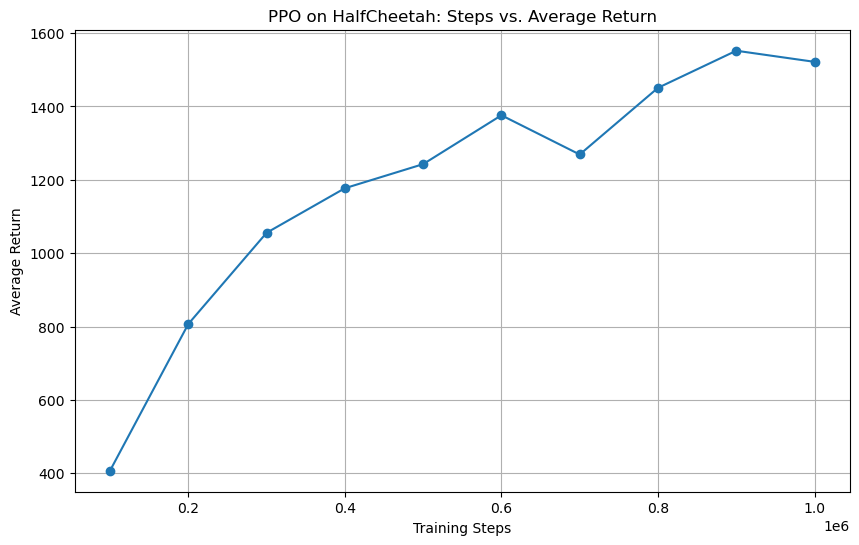

In [21]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
import numpy as np
import matplotlib.pyplot as plt

# Create the Gym environment
env = gym.make('HalfCheetah-v4')

# Specify the device (GPU or CPU)
device = "cuda"  # Change to "cpu" if you don't have a GPU

# Initialize the PPO model with GPU
model = PPO('MlpPolicy', env, verbose=1, device=device)

# Define evaluation and training parameters
eval_interval = 100_000
total_timesteps = 1000000
eval_episodes = 10

# Initialize lists to store evaluation results
steps_list = []
mean_rewards = []

steps_so_far = 0
while steps_so_far < total_timesteps:
    # Train for eval_interval steps
    model.learn(total_timesteps=eval_interval, reset_num_timesteps=False)
    steps_so_far += eval_interval
    
    # Evaluate the model
    mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=eval_episodes)
    steps_list.append(steps_so_far)
    mean_rewards.append(mean_reward)

# Plot steps vs. average return
plt.figure(figsize=(10, 6))
plt.plot(steps_list, mean_rewards, marker='o')
plt.title('PPO on HalfCheetah: Steps vs. Average Return')
plt.xlabel('Training Steps')
plt.ylabel('Average Return')
plt.grid(True)
plt.show()


In [22]:


# Specify the filename for the CSV
csv_file = "ppo_halfcheetah_results.csv"

# Save the results to a CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Training Steps", "Average Return"])
    writer.writerows(zip(steps_list, mean_rewards))

print(f"Results saved to {csv_file}")


Results saved to ppo_halfcheetah_results.csv


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -480     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 176      |
|    time_elapsed    | 22       |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | 3.4      |
|    critic_loss     | 0.158    |
|    learning_rate   | 0.001    |
|    n_updates       | 3899     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -436     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 183      |
|    time_elapsed    | 43       |
|    total_timesteps | 8000     |
| train/             |          |
|    actor_loss      | 0.933    |
|    critic_loss     

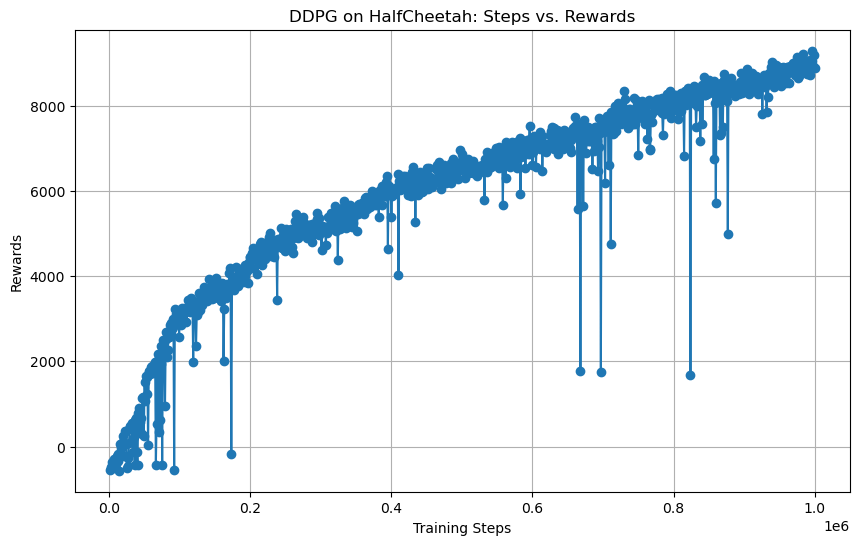

In [23]:

from stable_baselines3 import DDPG
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.callbacks import BaseCallback
import numpy as np

import matplotlib.pyplot as plt

# Custom callback to log training steps and rewards
class LogCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(LogCallback, self).__init__(verbose)
        self.training_data = []

    def _on_step(self) -> bool:
        # Log time step and episode reward if available
        self.training_data.append({
            'step': self.num_timesteps,
            'reward': self.locals['infos'][0]['episode']['r'] if 'episode' in self.locals['infos'][0] else None
        })
        return True

# Create the Gym environment
env = gym.make('HalfCheetah-v4')

# Define action noise for DDPG
n_actions = env.action_space.shape[0]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

# Specify the device (GPU or CPU)
device = "cuda"  # Change to "cpu" if you don't have a GPU

# Initialize the DDPG model with GPU
model = DDPG('MlpPolicy', env, action_noise=action_noise, verbose=1, device=device)

# Define training parameters
total_timesteps = 1_000_000

# Initialize the callback
log_callback = LogCallback()

# Train the model with the callback
model.learn(total_timesteps=total_timesteps, callback=log_callback)

# Save the training data to a CSV file
csv_file = "ddpg_halfcheetah_all_steps.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=["step", "reward"])
    writer.writeheader()
    writer.writerows(log_callback.training_data)

print(f"All training data saved to {csv_file}")

# Evaluate the model
from stable_baselines3.common.evaluation import evaluate_policy
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Mean reward: {mean_reward}, Std reward: {std_reward}")

# Plot steps vs. rewards from the logged data
steps = [data['step'] for data in log_callback.training_data if data['reward'] is not None]
rewards = [data['reward'] for data in log_callback.training_data if data['reward'] is not None]

plt.figure(figsize=(10, 6))
plt.plot(steps, rewards, marker='o')
plt.title('DDPG on HalfCheetah: Steps vs. Rewards')
plt.xlabel('Training Steps')
plt.ylabel('Rewards')
plt.grid(True)
plt.show()

In [24]:
import csv

# Specify the filename for the CSV
csv_file = "ddpg_halfcheetah_results.csv"

# Save the results to a CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Training Steps", "Average Return"])
    writer.writerows(zip(steps_list, mean_rewards))

print(f"Results saved to {csv_file}")


Results saved to ddpg_halfcheetah_results.csv


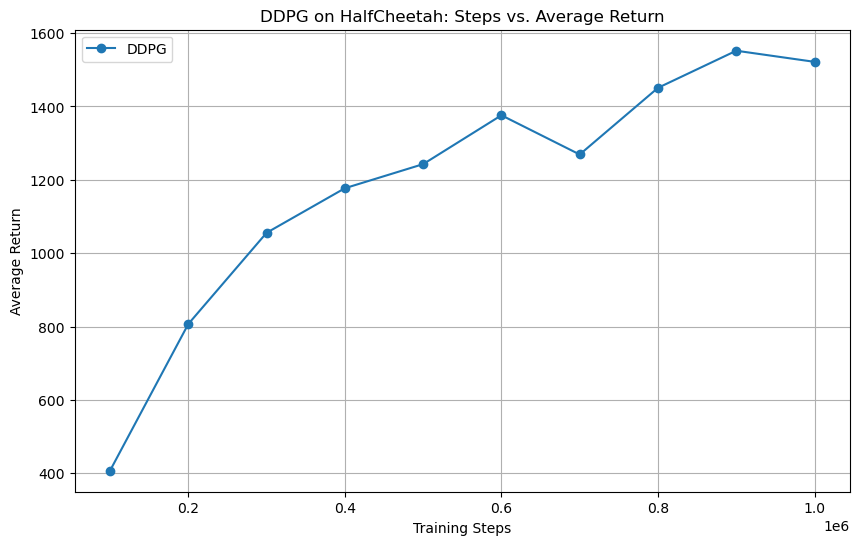

In [25]:


# Load the CSV file
csv_file = "ddpg_halfcheetah_results.csv"
data = pd.read_csv(csv_file)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data["Training Steps"], data["Average Return"], marker='o', label="DDPG")
plt.title('DDPG on HalfCheetah: Steps vs. Average Return')
plt.xlabel('Training Steps')
plt.ylabel('Average Return')
plt.grid(True)
plt.legend()
plt.show()

In [27]:
import csv

# Specify the filename for the CSV
csv_file = "ddpg_halfcheetah_results.csv"

# Initialize lists for aggregated steps and mean rewards
steps_list = []
mean_rewards = []

# Define the interval for aggregation (e.g., every 10,000 steps)
interval = 100000
current_interval_rewards = []
current_step = 0

# Iterate through the logged data
for data in log_callback.training_data:
    if data['reward'] is not None:
        current_interval_rewards.append(data['reward'])
        current_step = data['step']

        # Check if the interval is reached
        if current_step % interval == 0 and current_interval_rewards:
            mean_reward = sum(current_interval_rewards) / len(current_interval_rewards)
            steps_list.append(current_step)
            mean_rewards.append(mean_reward)
            current_interval_rewards = []  # Reset for the next interval

# Save the aggregated results to a CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Training Steps", "Average Return"])
    writer.writerows(zip(steps_list, mean_rewards))

print(f"Results extracted and saved to {csv_file}")


Results extracted and saved to ddpg_halfcheetah_results.csv


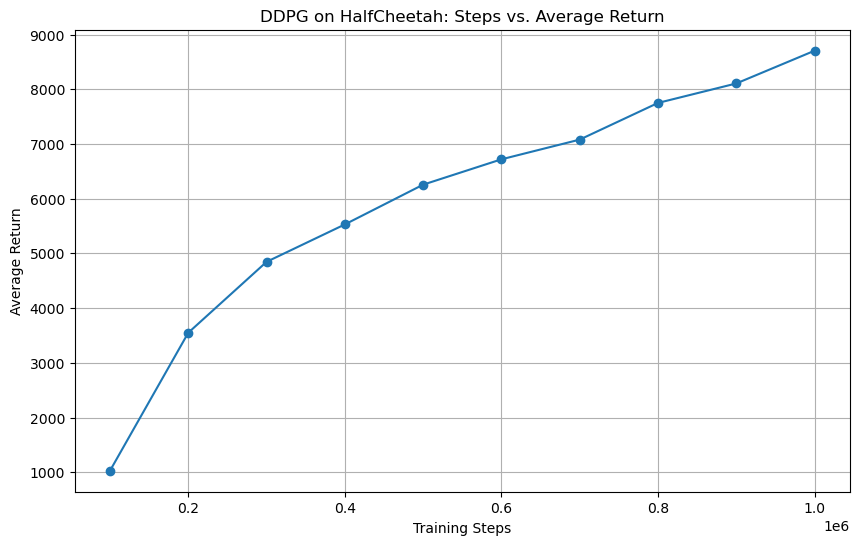

In [28]:
import matplotlib.pyplot as plt

# Plot the aggregated results
plt.figure(figsize=(10, 6))
plt.plot(steps_list, mean_rewards, marker='o')
plt.title('DDPG on HalfCheetah: Steps vs. Average Return')
plt.xlabel('Training Steps')
plt.ylabel('Average Return')
plt.grid(True)
plt.show()
